# Absatzprognose 

## 0. Setup

In [31]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from pathlib import Path # Import für professionelles Pfad-Management

In [32]:
# Konfiguration

# Pfad
DATA_FOLDER = "Data"
FILE_NAME = "Absatz_und_Werbeausgaben_2012_bis_2022.xlsx"
DATA_FILE = Path(DATA_FOLDER) / FILE_NAME

# Parameter
RANDOM_STATE = 42 # Für reproduzierbare Ergebnisse

# Matplotlib-Plots direkt im Notebook anzeigen und Theme setzen
%matplotlib inline
sns.set_theme(style="whitegrid")

## 1. Daten Laden 

In [33]:
try:
    df = pd.read_excel(DATA_FILE)
    print(f"Daten erfolgreich geladen. {len(df)} Datensätze gefunden.")
except FileNotFoundError:
    print(f"FEHLER: Die Datei '{DATA_FILE}' wurde nicht gefunden. Bitte überprüfen Sie den Pfad.")
    df = None

Daten erfolgreich geladen. 132 Datensätze gefunden.


## 2. Analyse mit Scatter Plot

In [34]:
# Add a counter column
df['Counter'] = df.index + 1 # +1 to start counting from 1 instead of 0
print(f"Counter-Spalten hinzugefügt: {df.columns.tolist()}")

Counter-Spalten hinzugefügt: ['Monat', 'Absatz [Einheiten]', 'Werbeausgaben [€]', 'Counter']


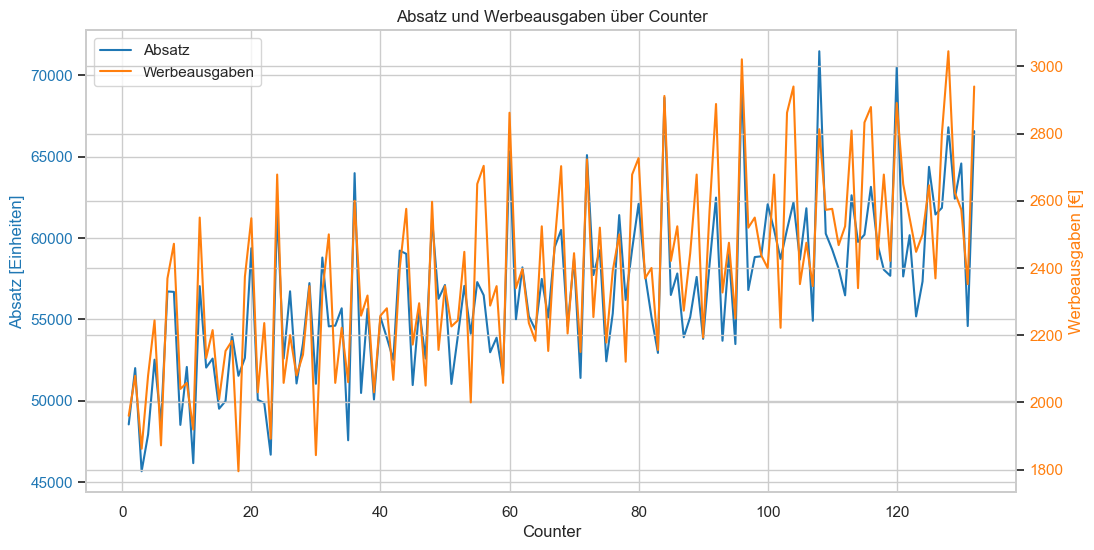

In [35]:
# Plot 
plt.figure(figsize=(12, 6))  

# Erste Achse (linke y-Achse)
ax1 = plt.gca()
sns.lineplot(x='Counter', y='Absatz [Einheiten]', data=df, color='tab:blue', ax=ax1)
ax1.set_xlabel('Counter')
ax1.set_ylabel('Absatz [Einheiten]', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Zweite Achse (rechte y-Achse)
ax2 = ax1.twinx()
sns.lineplot(x='Counter', y='Werbeausgaben [€]', data=df, color='tab:orange', ax=ax2)
ax2.set_ylabel('Werbeausgaben [€]', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Titel und Gitter
plt.title('Absatz und Werbeausgaben über Counter')
ax1.grid(True)

# Manuelle Legende
lines_1, = ax1.plot([], [], color='tab:blue', label='Absatz')
lines_2, = ax2.plot([], [], color='tab:orange', label='Werbeausgaben')
ax1.legend(handles=[lines_1, lines_2], loc='upper left')

plt.show()

## 3. Werbeausgaben als unabhängige Variable definieren 

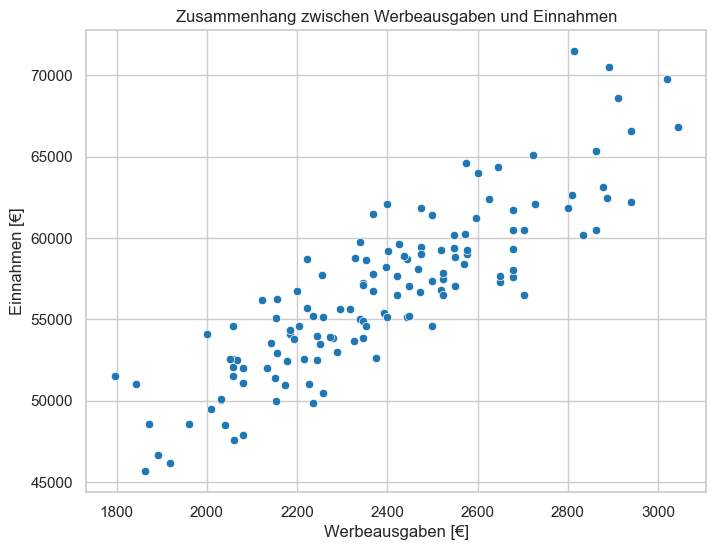

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Werbeausgaben [€]', y='Absatz [Einheiten]', data=df, color='tab:blue')

plt.title('Zusammenhang zwischen Werbeausgaben und Einnahmen')
plt.xlabel('Werbeausgaben [€]')
plt.ylabel('Einnahmen [€]')
plt.grid(True)
plt.show()


## 4. Entfernen der Monat-Spalte 

In [37]:
df = df.drop(columns=['Monat'])
print(f"Monats-Spalten gelöscht: {df.columns.tolist()}")


Monats-Spalten gelöscht: ['Absatz [Einheiten]', 'Werbeausgaben [€]', 'Counter']


## 5. Training 

In [38]:
# Eingangs- und Zielvariable festlegen
X = df[['Werbeausgaben [€]']]  
y = df['Absatz [Einheiten]']   

# Datensatz aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# y = mx + c
slope = model.coef_[0]
intercept = model.intercept_

print("Steigung (Koeffizient):", slope)
print("Achsenabschnitt (Intercept):", intercept)


Steigung (Koeffizient): 15.804562679520462
Achsenabschnitt (Intercept): 19090.24937237004


## 6. Vorhersagen 

In [40]:
# Wende das trainierte Modell auf die Werbeausgaben an
df['Prognose Absatz [Einheiten]'] = model.predict(df[['Werbeausgaben [€]']])

vergleich = df[['Werbeausgaben [€]', 'Absatz [Einheiten]', 'Prognose Absatz [Einheiten]']]
print(vergleich.head())


   Werbeausgaben [€]  Absatz [Einheiten]  Prognose Absatz [Einheiten]
0               1960               48548                 50067.192224
1               2079               52006                 51947.935183
2               1862               45671                 48518.345082
3               2080               47925                 51963.739746
4               2244               52523                 54555.688025


## 7. Darstellen 

In [41]:
# Gerade erstellen 
x_values = np.array([df['Werbeausgaben [€]'].min(), df['Werbeausgaben [€]'].max()])         # Wertebereich festlegen 
y_values = slope * x_values + intercept                                                 # Funktion erstellen 

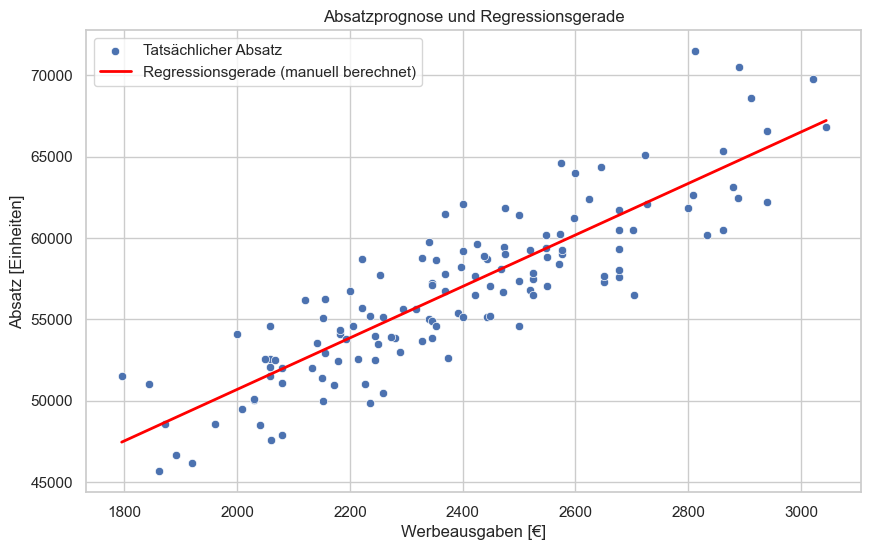

In [42]:
# Visualisierung der Regressionsgeraden mit den Originaldaten
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Werbeausgaben [€]', y='Absatz [Einheiten]', data=df, label='Tatsächlicher Absatz')    # Originaldaten
plt.plot(x_values, y_values, color='red', linewidth=2, label='Regressionsgerade (manuell berechnet)')   # Regressionsgerade

plt.title('Absatzprognose und Regressionsgerade')
plt.xlabel('Werbeausgaben [€]')
plt.ylabel('Absatz [Einheiten]')
plt.grid(True)
plt.legend()

plt.show()

## 8. Kennzahlen 

In [43]:
# Vorhersagen auf den Testdaten machen
y_pred = model.predict(X_test)

# R-Quadrat (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-Quadrat (R²): {r2:.4f}")

# Mittlerer Absoluter Fehler (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mittlerer Absoluter Fehler (MAE): {mae:.2f}")

# Mittlerer Quadratischer Fehler (MSE)
# Der Durchschnitt der quadrierten Differenzen. Größere Fehler werden stärker bestraft.
mse = mean_squared_error(y_test, y_pred)
print(f"Mittlerer Quadratischer Fehler (MSE): {mse:.2f}")


# Wurzel des Mittleren Quadratischen Fehlers (RMSE)
rmse = np.sqrt(mse)
print(f"Wurzel des Mittleren Quadratischen Fehlers (RMSE): {rmse:.2f}")



R-Quadrat (R²): 0.7123
Mittlerer Absoluter Fehler (MAE): 2234.16
Mittlerer Quadratischer Fehler (MSE): 6908968.70
Wurzel des Mittleren Quadratischen Fehlers (RMSE): 2628.49


## 9. Vergleich der Vorhersage und der Echten Daten

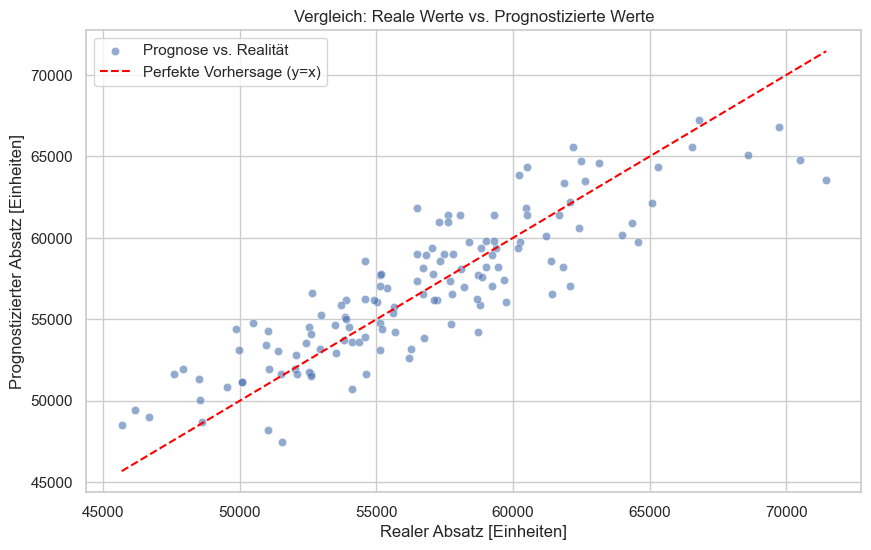

In [44]:
plt.figure(figsize=(10, 6))

# Reale Werte auf der X-Achse, Prognose auf der Y-Achse
sns.scatterplot(x='Absatz [Einheiten]', y='Prognose Absatz [Einheiten]', data=df, alpha=0.6, label='Prognose vs. Realität')

# Referenzlinie (perfekte Vorhersage: y = x)
min_val = min(df['Absatz [Einheiten]'].min(), df['Prognose Absatz [Einheiten]'].min())
max_val = max(df['Absatz [Einheiten]'].max(), df['Prognose Absatz [Einheiten]'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfekte Vorhersage (y=x)')

plt.title('Vergleich: Reale Werte vs. Prognostizierte Werte')
plt.xlabel('Realer Absatz [Einheiten]')
plt.ylabel('Prognostizierter Absatz [Einheiten]')
plt.grid(True)
plt.legend()

# Setzen der Achsengrenzen (Domain bounds)
# Wir fügen einen kleinen Puffer hinzu, damit die Punkte am Rand nicht abgeschnitten werden.
buffer = (max_val - min_val) * 0.05 # 5% Puffer
plt.xlim(min_val - buffer, max_val + buffer)
plt.ylim(min_val - buffer, max_val + buffer)

plt.show()

## 10. Weitere Kennzahlen für den Vergleich 

In [45]:
# Die .describe()-Methode berechnet automatisch viele nützliche statistische Kennzahlen.
statistik_vergleich = df[['Absatz [Einheiten]', 'Prognose Absatz [Einheiten]']].describe()

print("Statistischer Vergleich von realem Absatz und Prognose:")
print(statistik_vergleich)

Statistischer Vergleich von realem Absatz und Prognose:
       Absatz [Einheiten]  Prognose Absatz [Einheiten]
count          132.000000                   132.000000
mean         56682.401515                 56821.487602
std           5035.729096                  4354.473574
min          45671.000000                 47459.439382
25%          53357.000000                 53591.609702
50%          56700.000000                 56531.258360
75%          59384.750000                 59731.682303
max          71467.000000                 67215.142732
